In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Uso de librería "statsmodels"

Esta librería se usa mucho en aplicaciones estadísticas, pero tiene un compendio de métodos y funciones muy útiles para estimar modelos usando polinomios autorregresivos.

## Experimento de identificación

**Paso 1:** En este ejemplo, generamos 1000 observaciones de datos, incluyendo dos variables exógenas (x1 y x2) y una variable endógena (y).

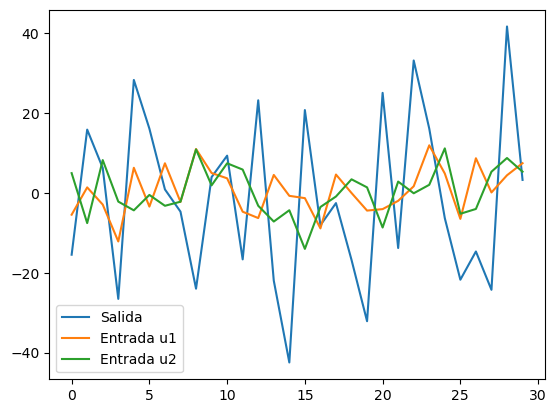

In [5]:
# Generar datos simulados
np.random.seed(123)
nobs = 30
exog = 5*np.random.randn(nobs,2)
endog = 20*np.random.randn(nobs)
data = pd.DataFrame(np.column_stack((endog, exog)), columns=['y', 'u1', 'u2'])

plt.plot(data.y)
plt.plot(data.u1)
plt.plot(data.u2)
plt.legend(['Salida','Entrada u1','Entrada u2'])

**Paso 2:** A continuación, dividiremos los datos en conjuntos de entrenamiento y prueba:

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
nobs_train = 8
train_data = data[:nobs_train]
test_data = data[nobs_train:]         

**Paso 3:** Ajustar un modelo a los datos de entrenamiento

In [7]:
# Crear matrices de diseño para los conjuntos de entrenamiento y prueba
exog_train = sm.add_constant(train_data[['u1','u2']])
exog_test = sm.add_constant(test_data[['u1','u2']])

# Ajustar el modelo 
model = sm.OLS(train_data['y'], exog_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     2.737
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.157
Time:                        14:25:14   Log-Likelihood:                -30.980
No. Observations:                   8   AIC:                             67.96
Df Residuals:                       5   BIC:                             68.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2950      5.536      0.956      0.3

C:\Users\POLI.RBASQUEZ\anaconda3\envs\SisDin\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


679.0033719735345

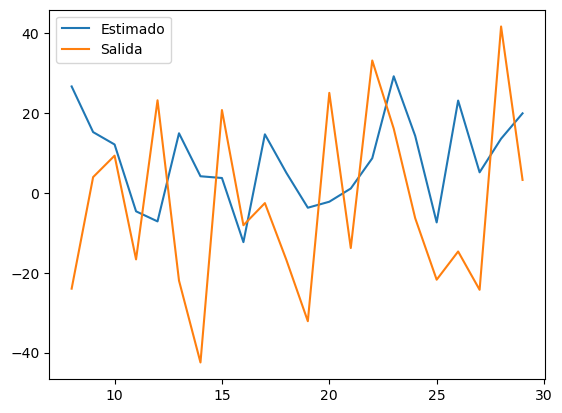

In [8]:
# VALIDAR MODELOS
# Hacer predicciones en el conjunto de prueba
preds = model.predict(exog_test)

# Calcular el error cuadrático medio de las predicciones
mse = np.mean((preds - test_data['y']) ** 2)

#ye = model.params.const + model.params.x1*data['x1'] + model.params.x2*data['x2']

plt.plot(preds)
plt.plot(test_data['y'])
plt.legend(['Estimado','Salida'])

mse
